## Tobigs 5주차 차원축소 과제 2
#### 15기 이윤정
---

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

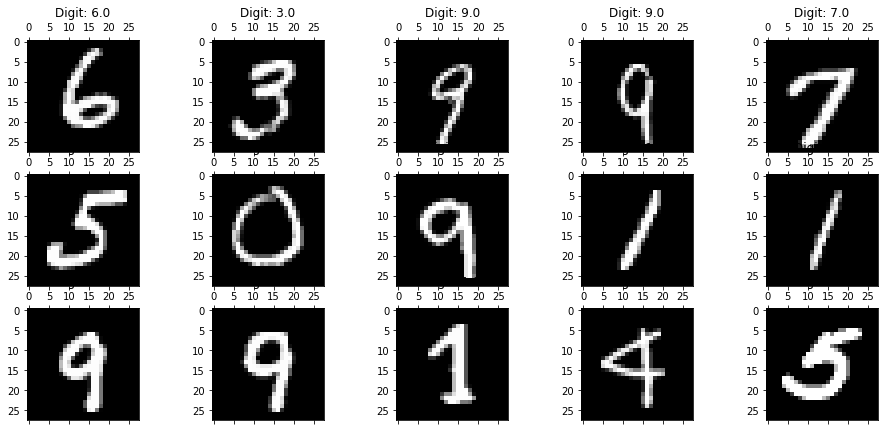

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

---
### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

---
#### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요
### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???  
  
#### PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum_pca = np.cumsum(pca.explained_variance_ratio_)
pca_d = np.argmax(cumsum_pca >= 0.95) + 1  #train set의 분산을 95%로 유지하는 데 필요한 최소 차원의 수
pca_d

154

train set의 분산을 95%로 유지하는 데 필요한 최소 차원의 수는 154개 이다.

In [17]:
pca = PCA(n_components=pca_d)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### LDA

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
cumsum_lda = np.cumsum(lda.explained_variance_ratio_)
lda_d = np.argmax(cumsum_lda >= 0.95) + 1  #train set의 분산을 95%로 유지하는 데 필요한 최소 차원의 수
lda_d

8

train set의 분산을 95%로 유지하는 데 필요한 최소 차원의 수는 8개 이다.

In [20]:
lda = LinearDiscriminantAnalysis(n_components=lda_d)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

---
### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요. (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

### 1. Logistic Regression
#### Original data

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

lr1 = LogisticRegression()
lr_t = time.time()
lr1.fit(X_train, y_train)
lr_t1 = time.time()

print('Training Time : {:.4f}s'.format(lr_t1-lr_t))

Training Time : 10.9834s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
lr_pred_original = lr1.predict(X_test)
lr_accuracy_original = accuracy_score(y_test, lr_pred_original)

print('Original Data Accuarcy : {:.5f}'.format(lr_accuracy_original))

Original Data Accuarcy : 0.92071


#### PCA data

In [25]:
lr2 = LogisticRegression()
lr_t = time.time()
lr2.fit(X_train_pca, y_train)
lr_t1 = time.time()

print('Training Time : {:.4f}s'.format(lr_t1-lr_t))

Training Time : 4.8776s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
lr_pred_pca = lr2.predict(X_test_pca)
lr_accuracy_pca = accuracy_score(y_test, lr_pred_pca)

print('PCA Data Accuarcy : {:.5f}'.format(lr_accuracy_pca))

PCA Data Accuarcy : 0.91664


#### LDA data

In [27]:
lr3 = LogisticRegression()
lr_t = time.time()
lr3.fit(X_train_lda, y_train)
lr_t1 = time.time()

print('Training Time : {:.4f}s'.format(lr_t1-lr_t))

Training Time : 2.1508s


In [30]:
lr_pred_lda = lr3.predict(X_test_lda)
lr_accuracy_lda = accuracy_score(y_test, lr_pred_lda)

print('LDA Data Accuarcy : {:.5f}'.format(lr_accuracy_lda))

LDA Data Accuarcy : 0.88414


---
### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
rf_t = time.time()
rf1.fit(X_train, y_train)
rf_t1 = time.time()

print('Training Time : {:.4f}s'.format(rf_t1-rf_t))

Training Time : 35.8177s


In [32]:
rf_pred_original = rf1.predict(X_test)
rf_accuracy_original = accuracy_score(y_test, rf_pred_original)

print('Original Data Accuarcy : {:.5f}'.format(rf_accuracy_original))

Original Data Accuarcy : 0.97036


#### PCA data

In [36]:
rf2 = RandomForestClassifier()
rf_t = time.time()
rf2.fit(X_train_pca, y_train)
rf_t1 = time.time()

print('Training Time : {:.4f}s'.format(rf_t1-rf_t))

Training Time : 81.4573s


In [37]:
rf_pred_pca = rf2.predict(X_test_pca)
rf_accuracy_pca = accuracy_score(y_test, rf_pred_pca)

print('PCA Data Accuarcy : {:.5f}'.format(rf_accuracy_pca))

PCA Data Accuarcy : 0.94643


#### LDA data

In [38]:
rf3 = RandomForestClassifier()
rf_t = time.time()
rf3.fit(X_train_lda, y_train)
rf_t1 = time.time()

print('Training Time : {:.4f}s'.format(rf_t1-rf_t))

Training Time : 13.6087s


In [39]:
rf_pred_lda = rf3.predict(X_test_lda)
rf_accuracy_lda = accuracy_score(y_test, rf_pred_lda)

print('LDA Data Accuarcy : {:.5f}'.format(rf_accuracy_lda))

LDA Data Accuarcy : 0.91050


---
### SVM
#### Original data

In [40]:
from sklearn.svm import SVC

svc1 = SVC()
svc_t = time.time()
svc1.fit(X_train, y_train)
svc_t1 = time.time()

print('Training Time : {:.4f}s'.format(svc_t1-svc_t))

Training Time : 348.8810s


In [41]:
svc_pred_original = svc1.predict(X_test)
svc_accuracy_original = accuracy_score(y_test, svc_pred_original)

print('Original Data Accuarcy : {:.5f}'.format(svc_accuracy_original))

Original Data Accuarcy : 0.97943


#### PCA data

In [42]:
svc2 = SVC()
svc_t = time.time()
svc2.fit(X_train_pca, y_train)
svc_t1 = time.time()

print('Training Time : {:.4f}s'.format(svc_t1-svc_t))

Training Time : 93.7313s


In [43]:
svc_pred_pca = svc2.predict(X_test_pca)
svc_accuracy_pca = accuracy_score(y_test, svc_pred_pca)

print('PCA Data Accuarcy : {:.5f}'.format(svc_accuracy_pca))

PCA Data Accuarcy : 0.98250


#### LDA data

In [44]:
svc3 = SVC()
svc_t = time.time()
svc3.fit(X_train_lda, y_train)
svc_t1 = time.time()

print('Training Time : {:.4f}s'.format(svc_t1-svc_t))

Training Time : 9.8986s


In [45]:
svc_pred_lda = svc3.predict(X_test_lda)
svc_accuracy_lda = accuracy_score(y_test, svc_pred_lda)

print('LDA Data Accuarcy : {:.5f}'.format(svc_accuracy_lda))

LDA Data Accuarcy : 0.90971


---
### KNN
#### Original data

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()
knn_t = time.time()
knn1.fit(X_train, y_train)
knn_t1 = time.time()

print('Training Time : {:.4f}s'.format(knn_t1-knn_t))

Training Time : 25.8756s


In [47]:
knn_pred_original = knn1.predict(X_test)
knn_accuracy_original = accuracy_score(y_test, knn_pred_original)

print('Original Data Accuarcy : {:.5f}'.format(knn_accuracy_original))

Original Data Accuarcy : 0.97171


#### PCA data

In [48]:
knn2 = KNeighborsClassifier()
knn_t = time.time()
knn2.fit(X_train_pca, y_train)
knn_t1 = time.time()

print('Training Time : {:.4f}s'.format(knn_t1-knn_t))

Training Time : 2.4235s


In [49]:
knn_pred_pca = knn2.predict(X_test_pca)
knn_accuracy_pca = accuracy_score(y_test, knn_pred_pca)

print('PCA Data Accuarcy : {:.5f}'.format(knn_accuracy_pca))

PCA Data Accuarcy : 0.97400


#### LDA data

In [50]:
knn3 = KNeighborsClassifier()
knn_t = time.time()
knn3.fit(X_train_lda, y_train)
knn_t1 = time.time()

print('Training Time : {:.4f}s'.format(knn_t1-knn_t))

Training Time : 0.1267s


In [51]:
knn_pred_lda = knn3.predict(X_test_lda)
knn_accuracy_lda = accuracy_score(y_test, knn_pred_lda)

print('LDA Data Accuarcy : {:.5f}'.format(knn_accuracy_lda))

LDA Data Accuarcy : 0.90886


---
### Result

    PCA : 154
    LDA : 8

|Data|Logistic Regressin|Random Forest|SVM|KNN|
|:------:|:---:|:---:|:---:|:---:|
|Original|0.92071|0.97036|0.97943|0.97171|
|PCA|0.91664|0.94643|**0.98250**|0.97400|
|LDA|0.88414|0.91050|0.90971|0.90886|